# Figures: gravitational waves from a point mass orbiting at the ISCO of a Kerr black hole

In [1]:
version()

'SageMath version 10.2, Release Date: 2023-12-03'

In [2]:
%display latex

In [3]:
from kerrgeodesic_gw import (KerrBH,h_plus_particle, h_cross_particle, 
                             h_amplitude_particle_fourier, plot_spectrum_particle, 
                             plot_h_particle, h_particle_signal)

Directory to store the figure files (created if it does not exist already):

In [4]:
import os
figdir = "fig_gw_point_mass_ISCO/"
if not os.path.exists(figdir):
    os.makedirs(figdir)

## Expansion of the waveform in time Fourier series

The Fourier series expansion of the waveform $(h_+,h_\times)$ received at the location $(t,r,\theta,\phi)$ is
$$
    h_{+,\times}(t, r, \theta, \phi) = \sum_{m=1}^{+\infty} \left[ A_m^{+,\times}(r,\theta) \cos(m\psi) + B_m^{+,\times}(r,\theta)\sin(m\psi) \right] ,
$$
where
$$
    \psi := \omega_0 (t - r_*) - \phi + \phi_0 ,
$$
$\omega_0$ being the orbital frequency of the particle and $r_*$ the tortoise coordinate corresponding to $r$.

Note that the dependence of the Fourier coefficients $A_m^{+,\times}(r,\theta)$ and $B_m^{+,\times}(r,\theta)$ with respect to $r$ is simply $\mu/r$, where $\mu$ is the particle's mass. The dependence with respect to $\theta$ is more complicated and involves both the radius $r_0$ of the particle's orbit and the BH parameters $(M,a)$.

The functions `h_plus_particle_fourier` and `h_cross_particle_fourier` the rescaled Fourier coefficients 
$$ {\bar A}_m^{+,\times}(\theta) :=  \frac{r}{\mu} A_m^{+,\times}(r,\theta) $$
$$ {\bar B}_m^{+,\times}(\theta) :=  \frac{r}{\mu} B_m^{+,\times}(r,\theta) $$

In [5]:
def r_isco(a):
    return KerrBH(a).isco_radius()

### Amplitudes of the Fourier modes

The $+$ and $\times$ amplitudes of the Fourier mode $m$ are defined respectively by
$$ |h_m^+| := \sqrt{(A_m^+)^2 + (B_m^+)^2} \quad\mbox{and}\quad 
|h_m^\times| := \sqrt{(A_m^\times)^2 + (B_m^\times)^2} $$

These amplitudes are computed by the function `h_amplitude_particle_fourier`. The **spectrum** of the GW signal is defined as the sequence $(|h_m^+|, |h_m^\times|)_{m\geq 1}$. It is depicted by the function `plot_spectrum_particle`. In all the plots, $f_0$ stands for the orbital frequency of the emitting particle.

## Waveform spectrum

In [6]:
def ordital_period(a, r0):
    return RDF(2*pi*(r0^(3/2) + a))

### Comparison with 1.5-PN approx of Poisson (1993) for a=0

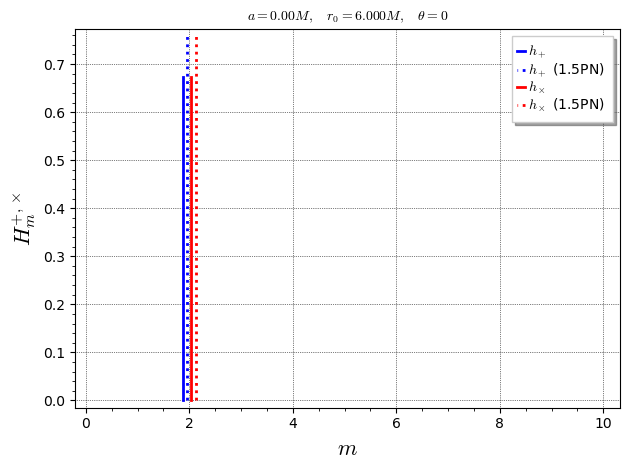

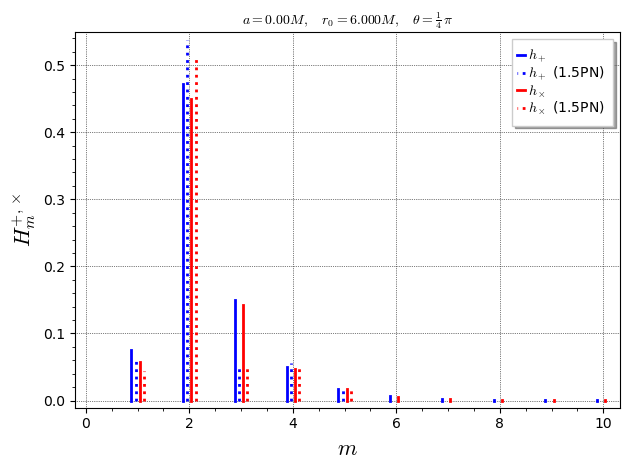

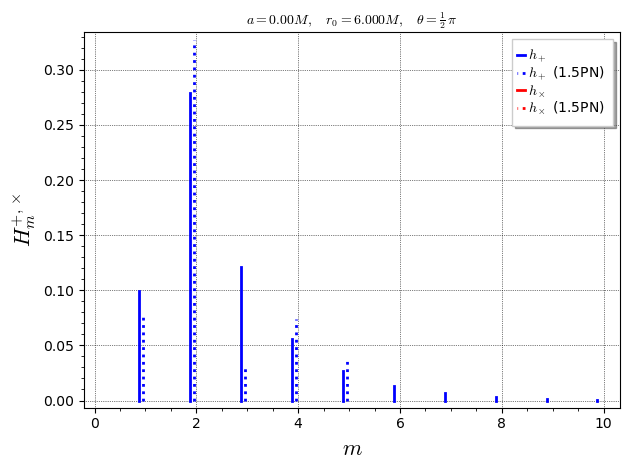

In [7]:
a = 0
r0 = 1.00001*r_isco(a)
for theta in [0, pi/4, pi/2]:
    graph = plot_spectrum_particle(a, r0, theta, legend_label=r'$h_+$', offset=-0.12)
    graph += plot_spectrum_particle(a, r0, theta, algorithm_Zinf='1.5PN', 
                                    l_max=5, linestyle=':', offset=-0.04,
                                    legend_label=r'$h_+$ (1.5PN)')
    graph += plot_spectrum_particle(a, r0, theta, mode='x', color='red', 
                                    legend_label=r'$h_\times$', offset=0.04)
    graph += plot_spectrum_particle(a, r0, theta, mode='x', algorithm_Zinf='1.5PN', 
                                    l_max=5, linestyle=':', color='red', 
                                    legend_label=r'$h_\times$ (1.5PN)', offset=0.12)

    show(graph)

### Spectra for a=0, 0.9 and 0.98

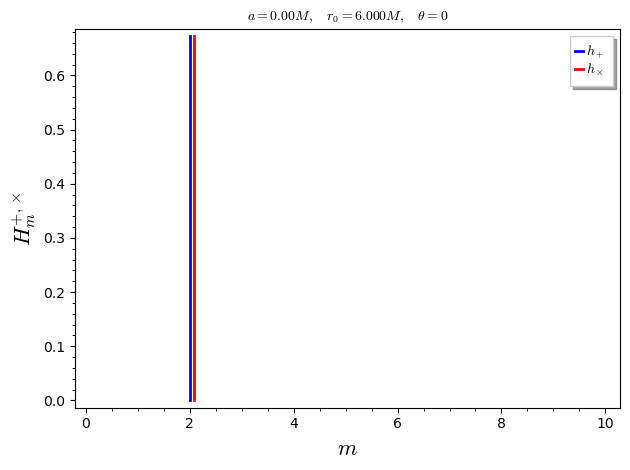

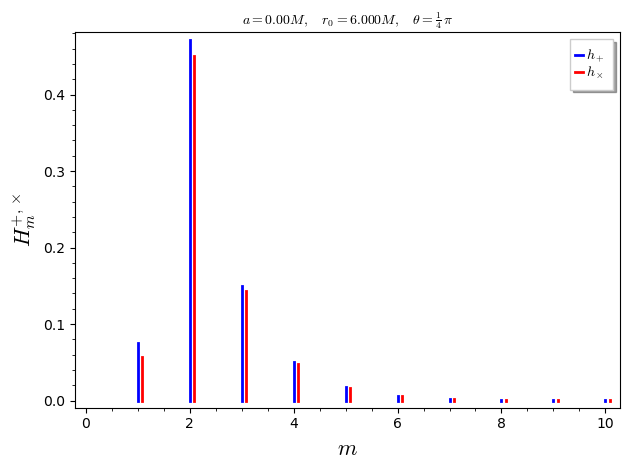

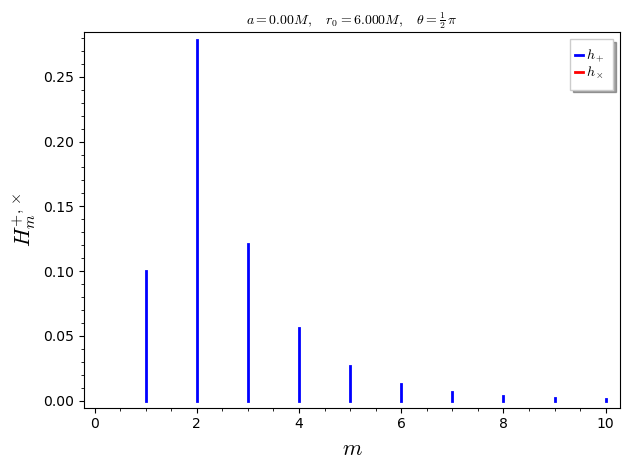

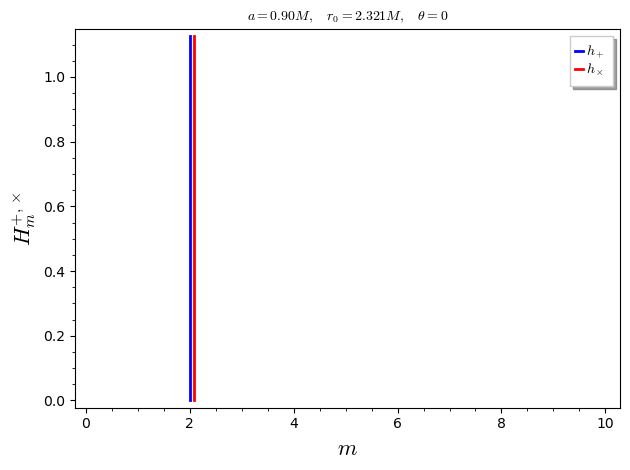

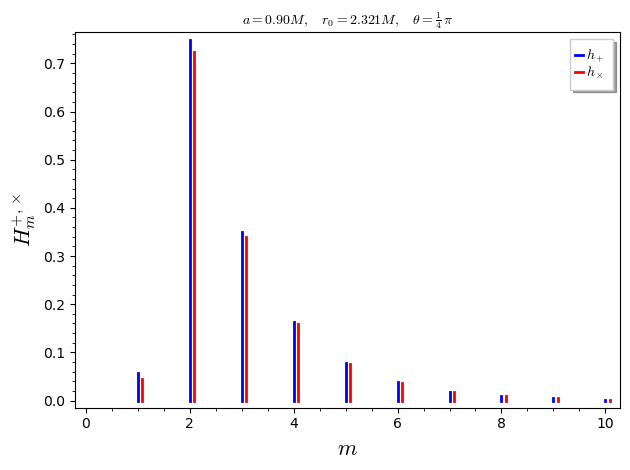

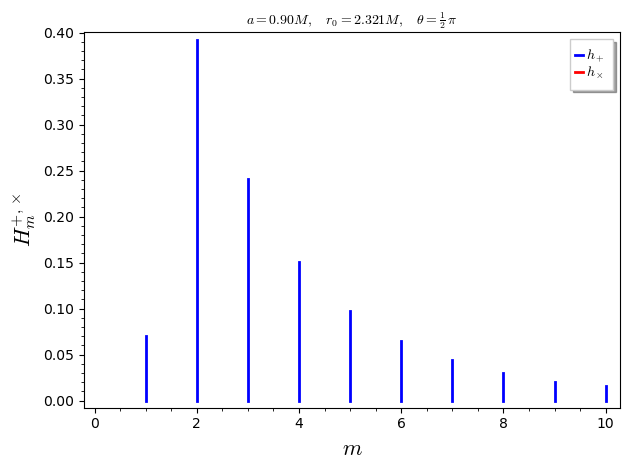

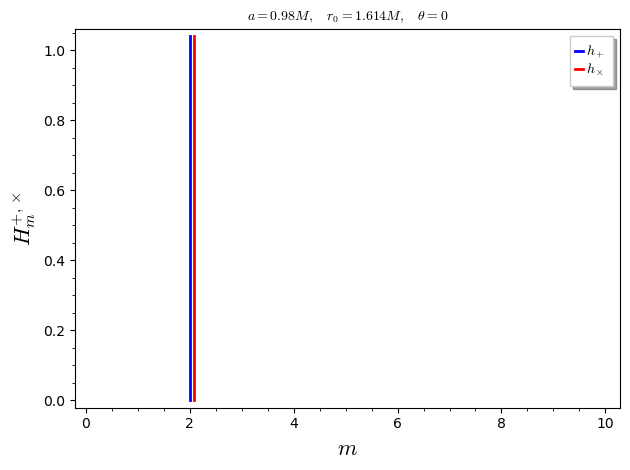

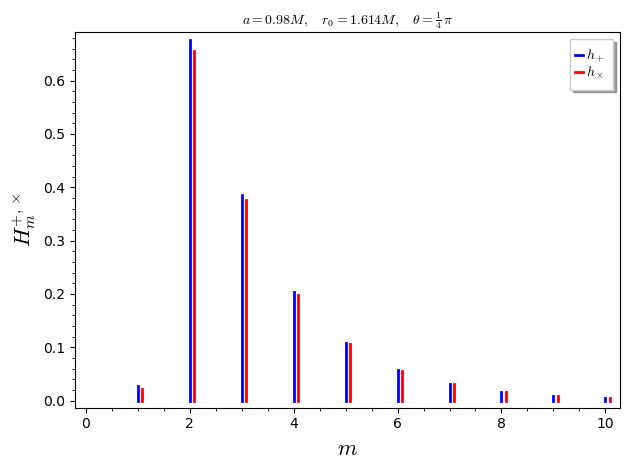

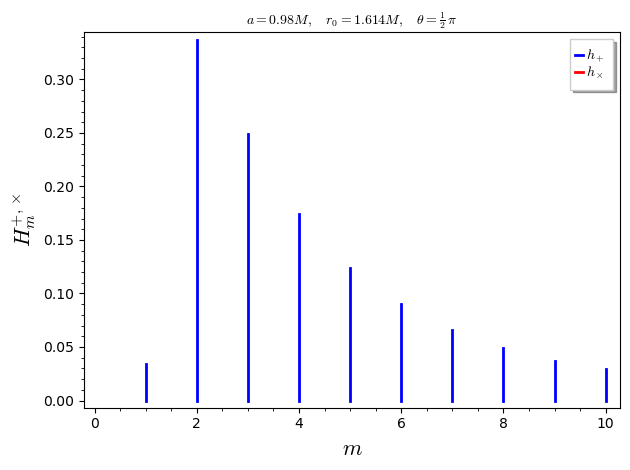

In [8]:
for a in [0, 0.9, 0.98]:
    r0 = 1.00001*r_isco(a)
    for theta in [1.e-5, pi/4, pi/2]:
        graph = plot_spectrum_particle(a, r0, theta, legend_label=r'$h_+$', gridlines=False)
        graph += plot_spectrum_particle(a, r0, theta, mode='x', color='red', 
                           legend_label=r'$h_\times$', offset=0.08, gridlines=False)
        fname = figdir + "spec_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))
        fname = fname.replace("a0.", "a").replace("th0.", "th")
        graph.save(fname)
        show(graph)

### Waveforms for a=0, 0.9 and 0.98

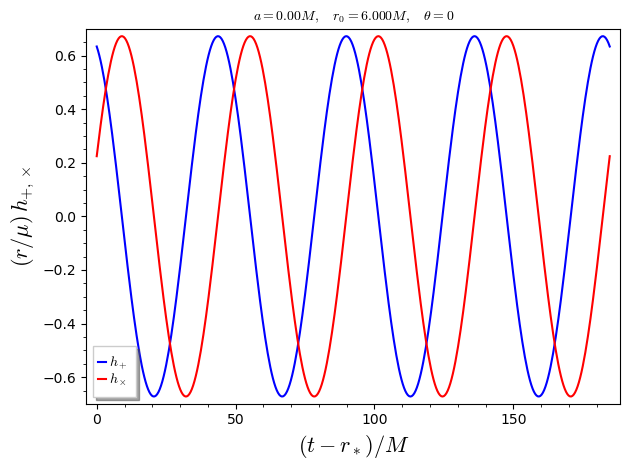

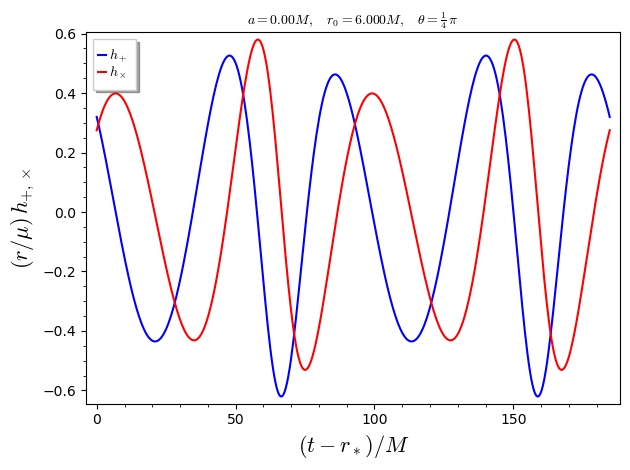

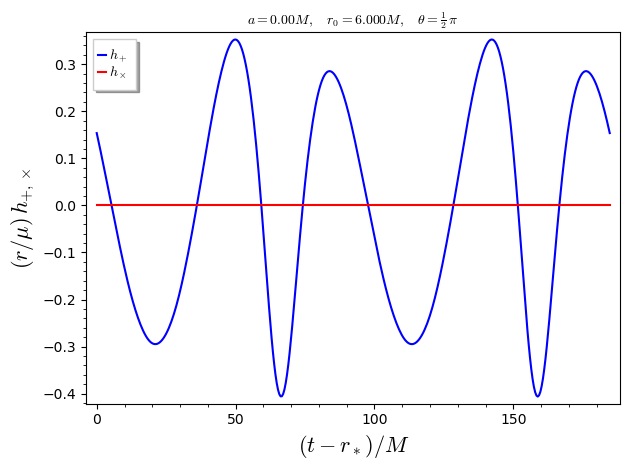

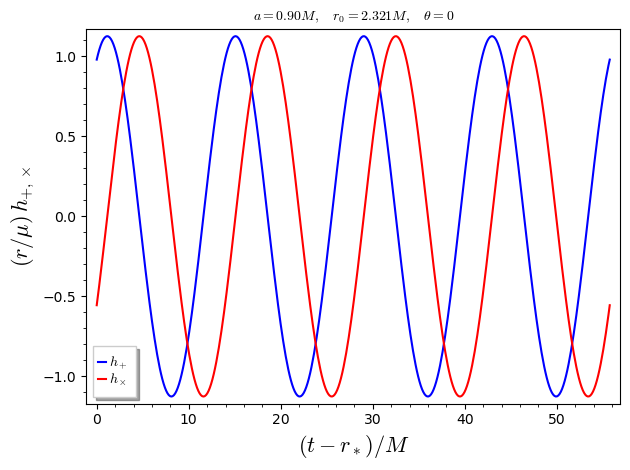

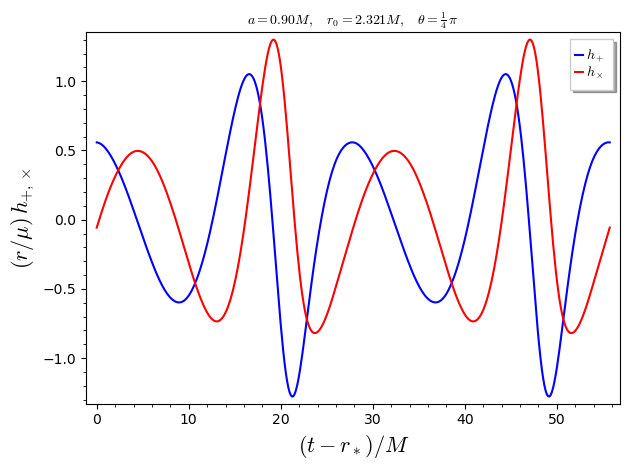

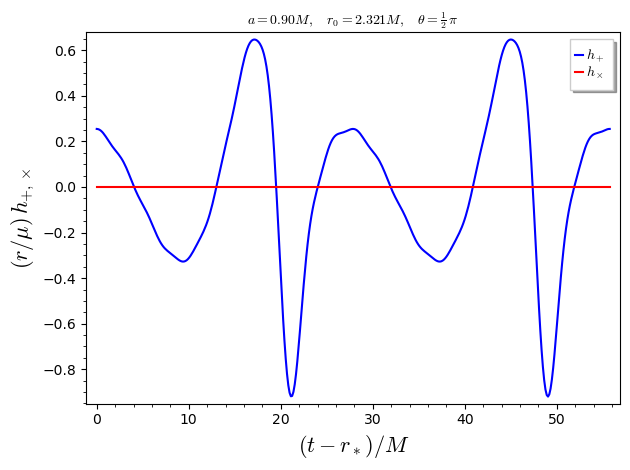

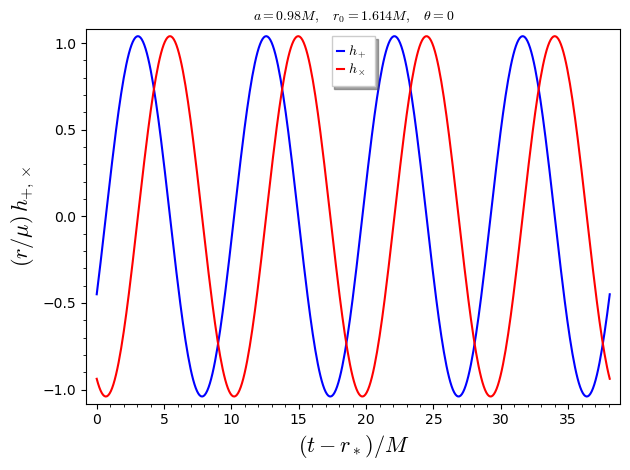

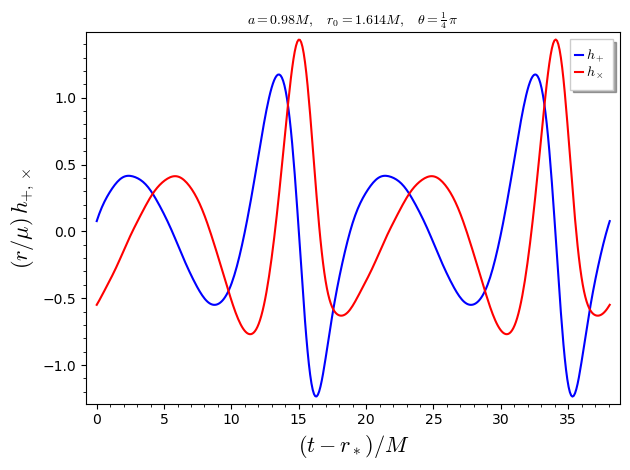

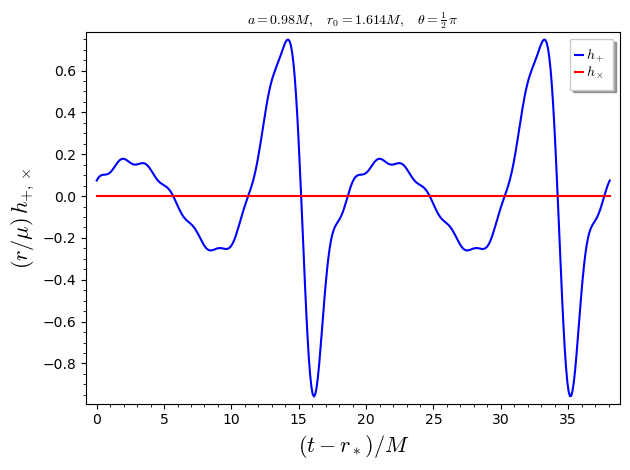

In [9]:
phi = 0
for a in [0., 0.9, 0.98]:
    r0 = 1.00001*r_isco(a)
    tmax = 2*ordital_period(a, r0)
    for theta in [0, pi/4, pi/2]:
        graph = plot_h_particle(a, r0, theta, phi, 0, tmax, plot_points=400, gridlines=False)
        fname = figdir + "h_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))
        fname = fname.replace("a0.", "a").replace("th0.", "th")
        graph.save(fname)
        show(graph)

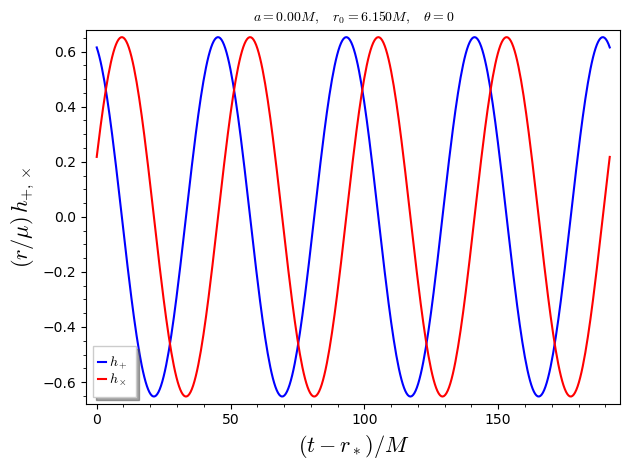

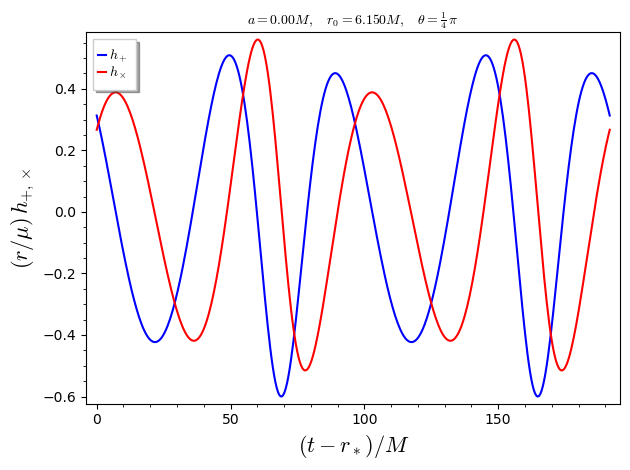

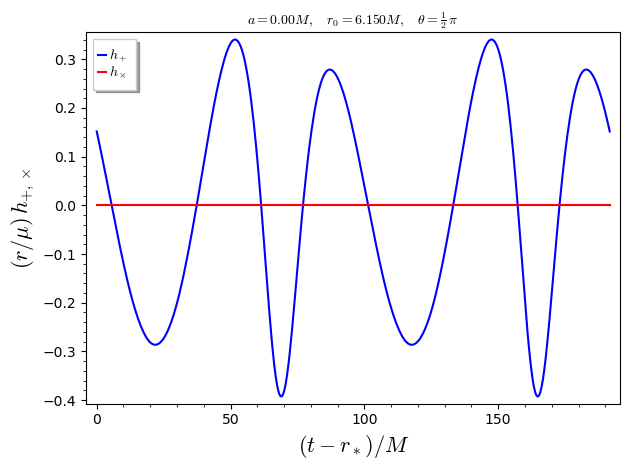

In [12]:
phi = 0
a=0
r0 = 0.15000+r_isco(a)
tmax = 2*ordital_period(a, r0)
for theta in [0, pi/4, pi/2]:
    graph = plot_h_particle(a, r0, theta, phi, 0, tmax, plot_points=400, gridlines=False)
    fname = figdir + "h_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))
    fname = fname.replace("a0.", "a").replace("th0.", "th")
    graph.save(fname)
    show(graph)

In [13]:
pathFile="BHP_toolkit"
import numpy as np

# Define the file path
file_path_imag = "/home/masrukuddin/Documents/M1_Intership/BHP_toolkit/wave_theta_imag.txt"

file_path_real = "/home/masrukuddin/Documents/M1_Intership/BHP_toolkit/wave_theta_real.txt"
# Load data from the text file into a NumPy array
data_array = np.loadtxt(file_path_imag)
data_array_R=np.loadtxt(file_path_real)

# Print the loaded data array
import matplotlib.pyplot as plt

plt.plot(data_array_R[:200],label=r'$h_+$')
plt.plot(-1*data_array[:200],label=r'$h_x$')
plt.legend()
plt.ylim(-0.4, 0.4)



plt.show()

FileNotFoundError: /home/masrukuddin/Documents/M1_Intership/BHP_toolkit/wave_theta_imag.txt not found.

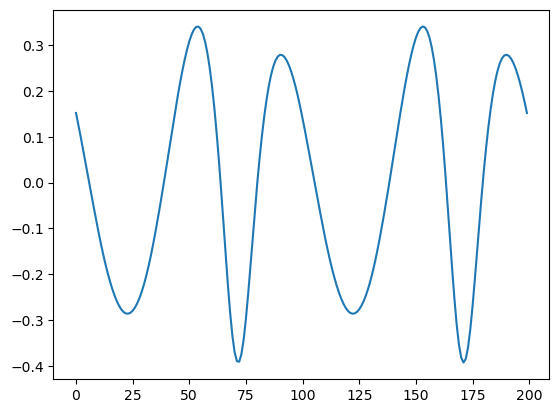

In [15]:

import matplotlib.pyplot as plt
phi1 = 0
newsig=[]
newsig2=[]
a1 = 0
r01 = 0.15000 + r_isco(a)
tmax1 = 3.156e+7/3.3356e10-9
theta1 = pi/2  # Initialize theta1 as a numeric value
signal1=h_particle_signal(a1, r01, theta1, phi1, 0, tmax,  mode='+',
                      nb_points=200, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)

for i in range(len(signal1)):
    newsig.append(signal1[i][1])
plt.plot(newsig)
# plt.plot(data_array_R[0:200])
plt.show()

In [16]:
data_array_R=np.loadtxt(file_path_real)
fname = figdir + "h_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))


FileNotFoundError: /home/masrukuddin/Documents/M1_Intership/BHP_toolkit/wave_theta_real.txt not found.

In [ ]:





phi1 = 0
newsig=[]
newsig2=[]
a1 = 0
r01 = 0.15000 + r_isco(a)
tmax1 = 2 * ordital_period(a, r0)
theta1 = pi/2  # Initialize theta1 as a numeric value
signal1=h_particle_signal(a1, r01, theta1, phi1, 0, tmax,  mode='x',
                      nb_points=400, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)

for i in range(len(signal1)):
    # print((signal1[i]))
    newsig.append(signal1[i][1])
    # plt.plot(signal1[i][1],label=r'$h_x$')



In [17]:

realdata = np.loadtxt("newdat.txt")


for i in range(len(signal1)):
    print(newsig[i]/realdata[i])

plt.plot(newsig)
plt.plot(realdata[:400])
plt.show()
graph = plot_h_particle(a1, r01, theta1, phi1, 0, tmax1, plot_points=400, gridlines=False)
fname = figdir + "h_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))
fname = fname.replace("a0.", "a").replace("th0.", "th")
graph.save(fname)
show(graph)

FileNotFoundError: newdat.txt not found.

[(0.0, 0.1517578265847811), (0.5012531328320802, 0.13903458610205985), (1.0025062656641603, 0.12600598377723093), (1.5037593984962405, 0.11272261359274265), (2.0050125313283207, 0.09923184402577696), (2.506265664160401, 0.08557662744839283), (3.007518796992481, 0.07179478519049878), (3.508771929824561, 0.057918843402513506), (4.010025062656641, 0.04397642877472856), (4.511278195488721, 0.029991167351505064), (5.012531328320802, 0.01598397171816687), (5.513784461152882, 0.0019745582823835557), (6.015037593984962, -0.012016988012292082), (6.516290726817042, -0.025968786935995608), (7.017543859649122, -0.03985604071346614), (7.518796992481203, -0.053650344849886775), (8.020050125313283, -0.06731950831613878), (8.521303258145362, -0.08082789892907126), (9.022556390977442, -0.09413726830942981), (9.523809523809524, -0.10720795545469), (10.025062656641603, -0.1200003250484013), (10.526315789473683, -0.1324762709512769), (11.027568922305765, -0.1446006096472689), (11.528822055137844, -0.15634

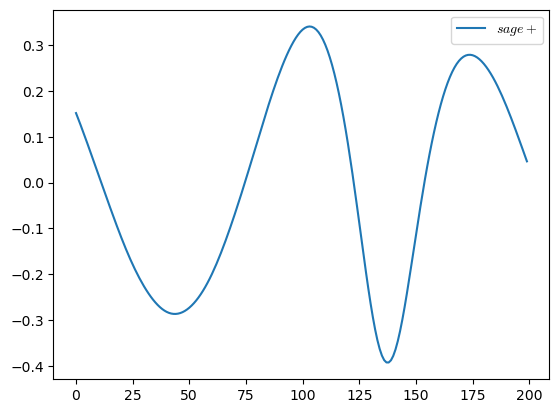

In [18]:

phi1 = 0
a1 = 0
r01 = 0.15000 + r_isco(a) 
tmax1 = 2 * ordital_period(a, r0)
theta1 = pi/2  # Initialize theta1 as a numeric value
signal1=h_particle_signal(a1, r01, theta1, phi1, 0, 200,  mode='+',
                      nb_points=400, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)
signal2=h_particle_signal(a1, r01, theta1, phi1, 0, 200,  mode='x',
                      nb_points=400, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)
list1=[]
list2=[]

print(signal1)
with open('output.txt', 'w+') as file:
    for i in range(len(signal1)):
        list1.append(signal1[i][1])
        file.write(str(signal1[i][1]) + '\n')

plt.figure()
plt.plot(list1[0:200],label=r'$sage +$')

# plt.plot(list2[0:200],label=r'$sage x$')
# plt.plot(wave.real[:500],label=r'$bhpTK$')
# plt.plot(wave.imag[:500],label=r'$h_x$')
plt.legend()
plt.show()

In [19]:
graph1 = plot_h_particle(a1, r01, theta1, phi1, 0, 105.288, plot_points=200, gridlines=False)
# graph2 = plot_h_particle(a1, r01, theta1, phi1, 0, 500, plot_points=200, gridlines=False)
graph+=line(file1)
fname = figdir + "h_point_mass_a{:.2f}_th{:.2f}.pdf".format(float(a), float(theta/pi))
# fname = fname.replace("a0.", "a").replace("th0.", "th")
graph.save(fname)
show(graph1)
# show(graph2)

NameError: name 'file1' is not defined

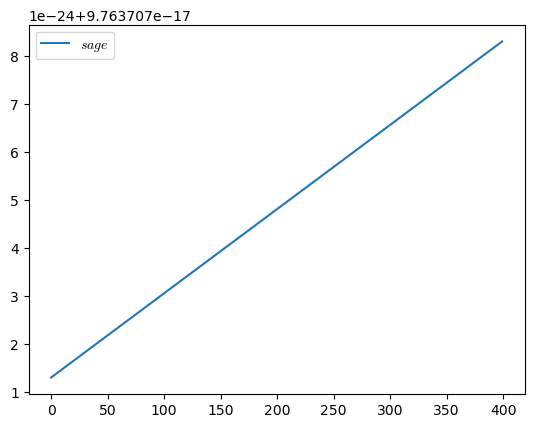

In [20]:
phi1 = 0
a1 = 0
r01 = 0.15000 + r_isco(a) 
tmax1 = 2 * ordital_period(a, r0)
theta1 = pi/2  # Initialize theta1 as a numeric value
signal1=h_particle_signal(a1, r01, theta1, phi1, 0, 60*10e-9,  mode='x',
                      nb_points=400, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)

file1=[]

with open('output.txt', 'w+') as file:
    for i in range(len(signal1)):
        file1.append(signal1[i][1])
        file.write(str(signal1[i][1]) + '\n')

plt.figure()
plt.plot(file1[0:1000],label=r'$sage$')
# plt.plot(wave.real[:500],label=r'$bhpTK$')
# plt.plot(wave.imag[:500],label=r'$h_x$')
plt.legend()
plt.show()

In [ ]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

In [ ]:
phi1 = 0
a1 = 0
r01 = 0.15000 + r_isco(a) 
tmax1 = 2 * ordital_period(a, r0)
theta1 = pi/2  # Initialize theta1 as a numeric value
signal1=h_particle_signal(a1, r01, theta1, phi1, 0, 60*10e-9,  mode='x',
                      nb_points=400, phi0=0, l_max=10, m_min=1,
                      approximation=None, store=None)

file1=[]

with open('output.txt', 'w+') as file:
    for i in range(len(signal1)):
        file1.append(signal1[i][1])
        file.write(str(signal1[i][1]) + '\n')

plt.figure()
plt.plot(file1[0:1000],label=r'$sage$')
# plt.plot(wave.real[:500],label=r'$bhpTK$')
# plt.plot(wave.imag[:500],label=r'$h_x$')
plt.legend()
plt.show()

NameError: name 'r_isco' is not defined